In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df=pd.read_csv('voice.csv')

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

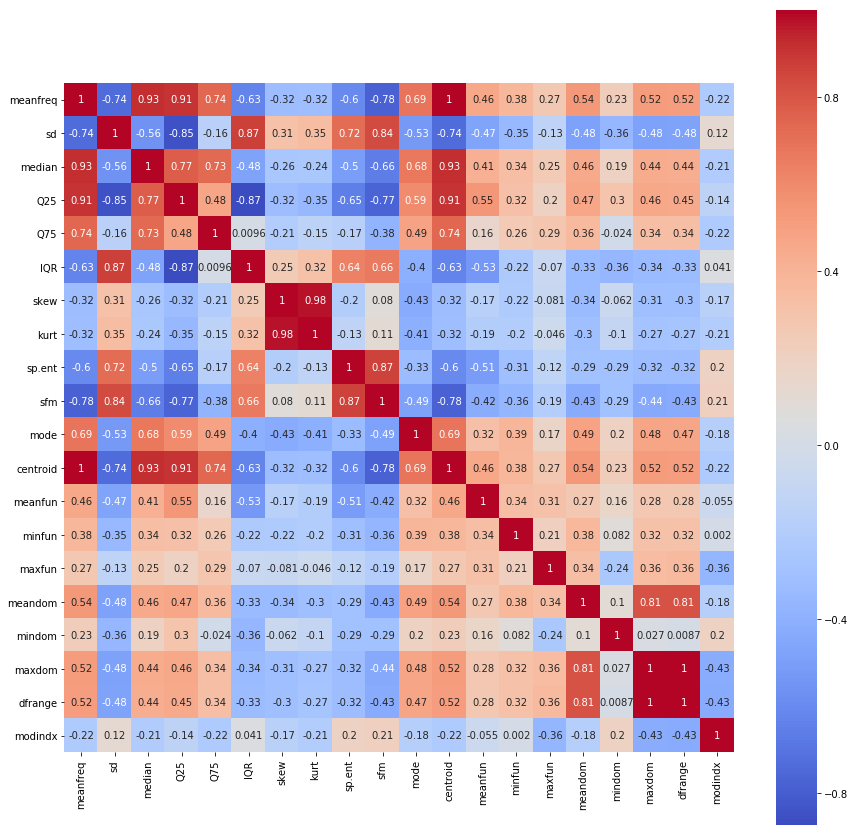

In [8]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True, annot=True ,cmap='coolwarm')

(meanfreq,centroid) and (maxdom,dfrange) show correlation value 1 thus removing those columns for simplification

There are other high correlations in the data too like between (kurt,skew) and (meanfreq,median) but not removing those because a neural network deals with such correlations by adjusting it's weights and bias values accordingly.

In [13]:
X=df.drop(['label','centroid','dfrange'],axis=1)
Y=df['label']

sc=StandardScaler()
sc.fit_transform(X)

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -0.70840431,
        -1.43142165, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -0.70840431,
        -1.41810716, -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -0.70840431,
        -1.42920257, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.70840431,
        -0.5992661 ,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.70840431,
        -0.41286326,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -0.70840431,
        -1.27608595,  1.47567886]])

Training a MLP model with 2 hidden layers of 8 and 4 neurons respectively , max iterations of 2000 until convergence , with a hyperbolic tangent function as activation and Limited-memory BFGS optimization.

In [14]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.30)

In [15]:
mlp_classifier= MLPClassifier(activation='tanh',hidden_layer_sizes=(8,4),max_iter=2000,solver='lbfgs',random_state=1)
mlp_classifier.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
mlp_classifier.score(X_test,Y_test)

0.9768664563617245

In [17]:
mlp_classifier= MLPClassifier(activation='tanh',hidden_layer_sizes=(20,15),max_iter=1000,solver='lbfgs',random_state=1)
mlp_classifier.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
mlp_classifier.score(X_test,Y_test)

0.9716088328075709

In [19]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X=df.drop(['label','centroid','dfrange'],axis=1)
Y=df['label']


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
cross_val_score(rfc, X, Y, cv=5)

array([0.93059937, 0.96529968, 0.97634069, 0.98107256, 0.96677215])

In [23]:
train = rfc.fit(X_train, Y_train)

print('Training set score:', rfc.score(X_train, Y_train))
print('\nTest set score:', rfc.score(X_test, Y_test))

Training set score: 0.9995489400090212

Test set score: 0.9831756046267087
